In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

data = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,2,3,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,5,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,7,1,...,4,80,1,6,3,3,2,2,2,2


EnvironmentSatisfaction, JobSatisfaction, 상관성이 확실

RelationshipSatisfaction, WorkLifeBalance 높은 사람도 퇴직을 많이 함.

YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager

In [4]:
data["Attrition"].replace('Yes',1,inplace=True)
data["Attrition"].replace('No',0,inplace=True)
data['Attrition']

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

In [3]:
data['EnvironmentSatisfaction'].value_counts()

3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64

                        RelationshipSatisfaction
Department                                      
Human Resources                         2.888889
Research & Development                  2.708637
Sales                                   2.695067
                        JobSatisfaction
Department                             
Human Resources                2.603175
Research & Development         2.726327
Sales                          2.751121


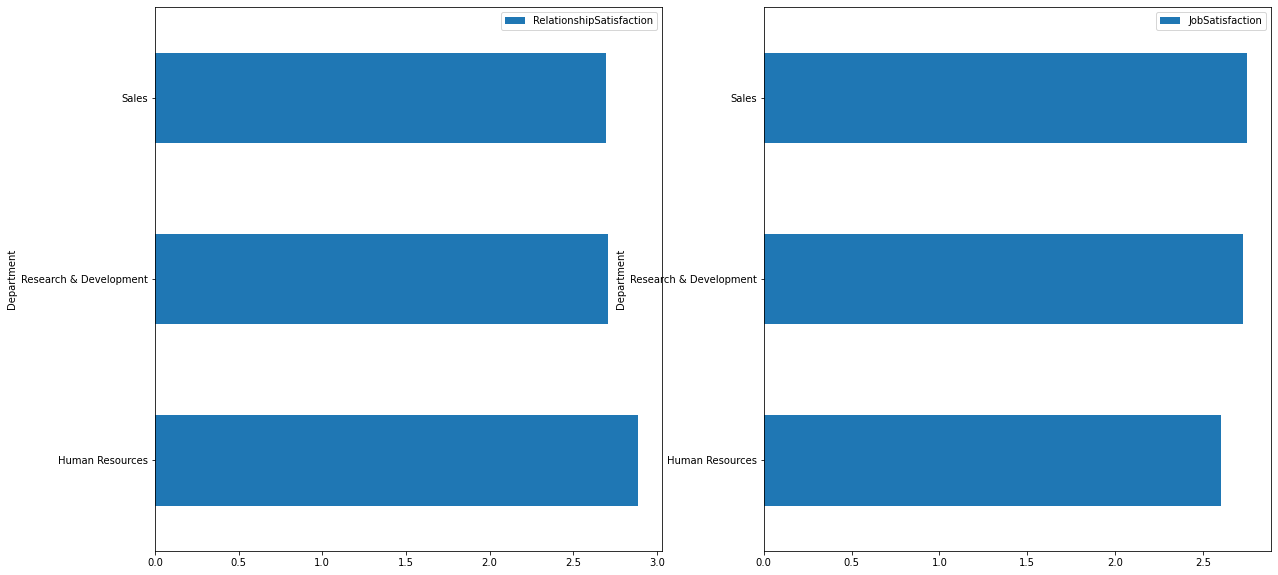

In [30]:
f, ax= plt.subplots(1,2,figsize=(20,10))

data[["RelationshipSatisfaction","Department"]].groupby("Department").mean().plot.barh(ax=ax[0])
data[["JobSatisfaction","Department"]].groupby("Department").mean().plot.barh(ax=ax[1])


print(data[["RelationshipSatisfaction","Department"]].groupby("Department").mean())
print(data[["JobSatisfaction","Department"]].groupby("Department").mean())

                        WorkLifeBalance
Department                             
Human Resources                2.920635
Research & Development         2.725286
Sales                          2.816143
                        JobSatisfaction
Department                             
Human Resources                2.603175
Research & Development         2.726327
Sales                          2.751121


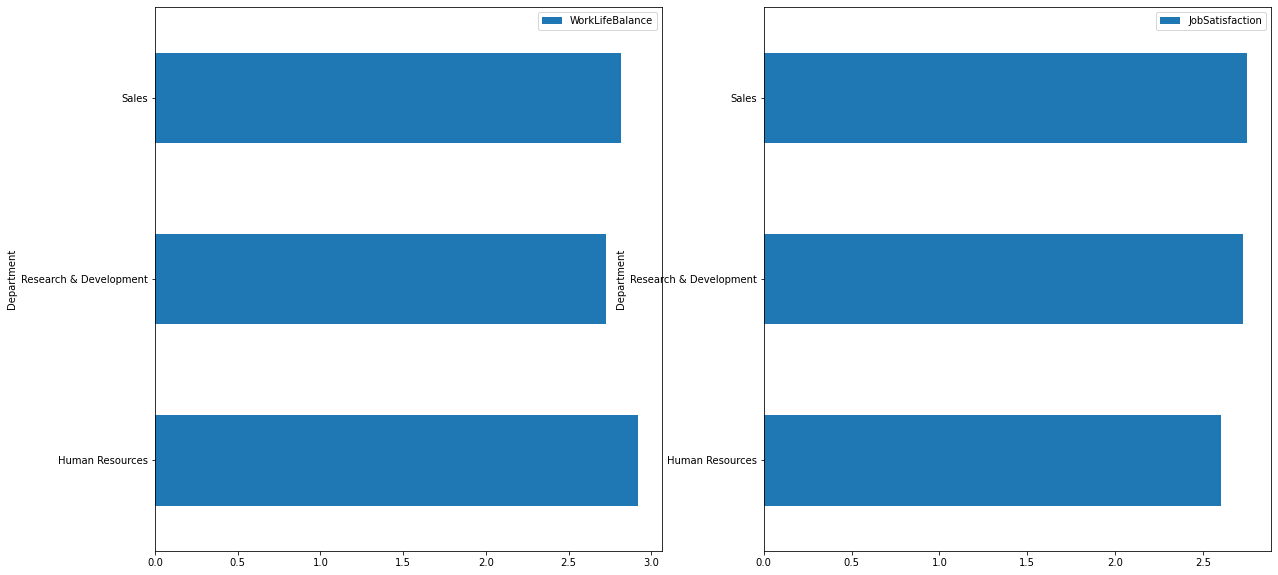

In [31]:
f, ax= plt.subplots(1,2,figsize=(20,10))

data[["WorkLifeBalance","Department"]].groupby("Department").mean().plot.barh(ax=ax[0])
data[["JobSatisfaction","Department"]].groupby("Department").mean().plot.barh(ax=ax[1])

print(data[['WorkLifeBalance',"Department"]].groupby("Department").mean())
print(data[["JobSatisfaction","Department"]].groupby("Department").mean())

<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

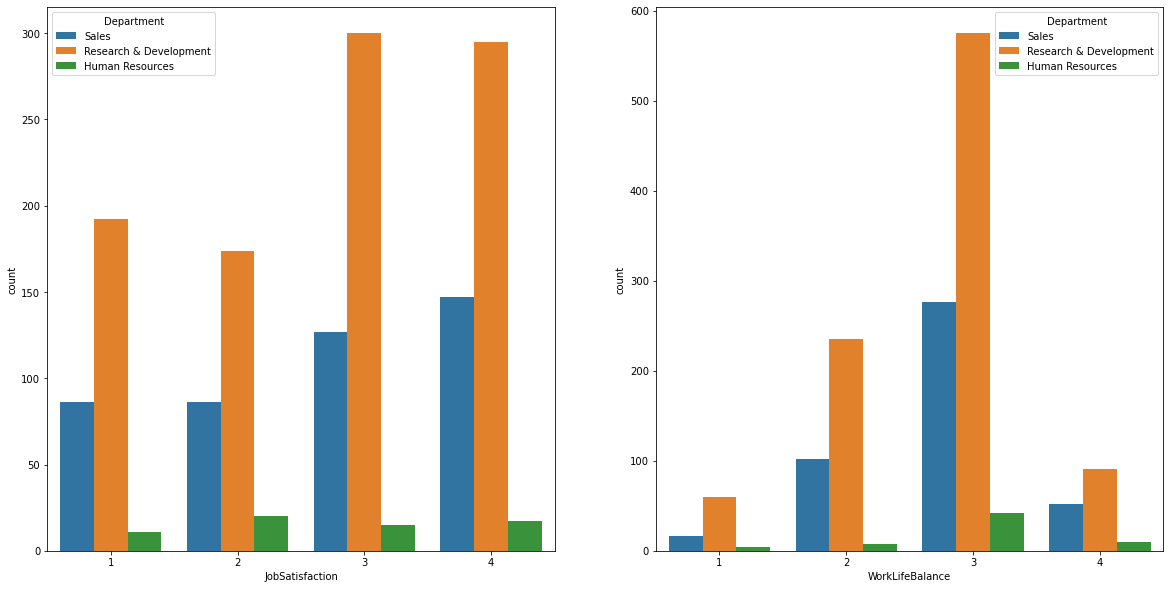

In [19]:
f, ax= plt.subplots(1,2,figsize=(20,10))

sns.countplot("WorkLifeBalance",hue='Department',ax=ax[1], data=data)
sns.countplot("JobSatisfaction",hue='Department',ax=ax[0], data=data)

In [23]:
Attrition=data.loc[data['Attrition']==1]
Attrition

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,2,...,1,80,0,8,0,1,6,4,0,5
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,4,...,2,80,0,7,3,3,0,0,0,0
14,28,1,Travel_Rarely,103,Research & Development,24,3,Life Sciences,19,3,...,2,80,0,6,4,3,4,2,0,3
21,36,1,Travel_Rarely,1218,Sales,9,4,Life Sciences,27,3,...,2,80,0,10,4,3,5,3,0,3
24,34,1,Travel_Rarely,699,Research & Development,6,1,Medical,31,2,...,3,80,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,1,Travel_Frequently,638,Sales,9,3,Marketing,2023,4,...,1,80,1,1,3,2,1,0,1,0
1442,29,1,Travel_Rarely,1092,Research & Development,1,4,Medical,2027,1,...,2,80,3,4,3,4,2,2,2,2
1444,56,1,Travel_Rarely,310,Research & Development,7,2,Technical Degree,2032,4,...,4,80,1,14,4,1,10,9,9,8
1452,50,1,Travel_Frequently,878,Sales,1,4,Life Sciences,2044,2,...,4,80,2,12,3,3,6,3,0,1


<AxesSubplot:ylabel='Department'>

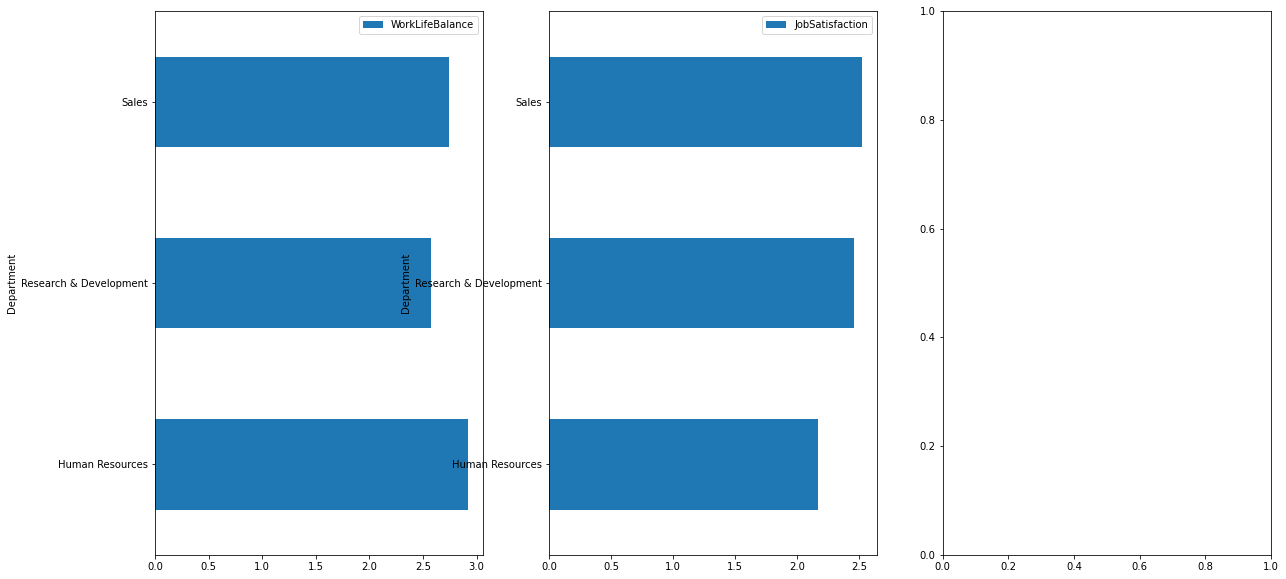

In [27]:
f, ax= plt.subplots(1,3,figsize=(20,10))
Attrition[["WorkLifeBalance","Department"]].groupby("Department").mean().plot.barh(ax=ax[0])
Attrition[["JobSatisfaction","Department"]].groupby("Department").mean().plot.barh(ax=ax[1])

<AxesSubplot:ylabel='Department'>

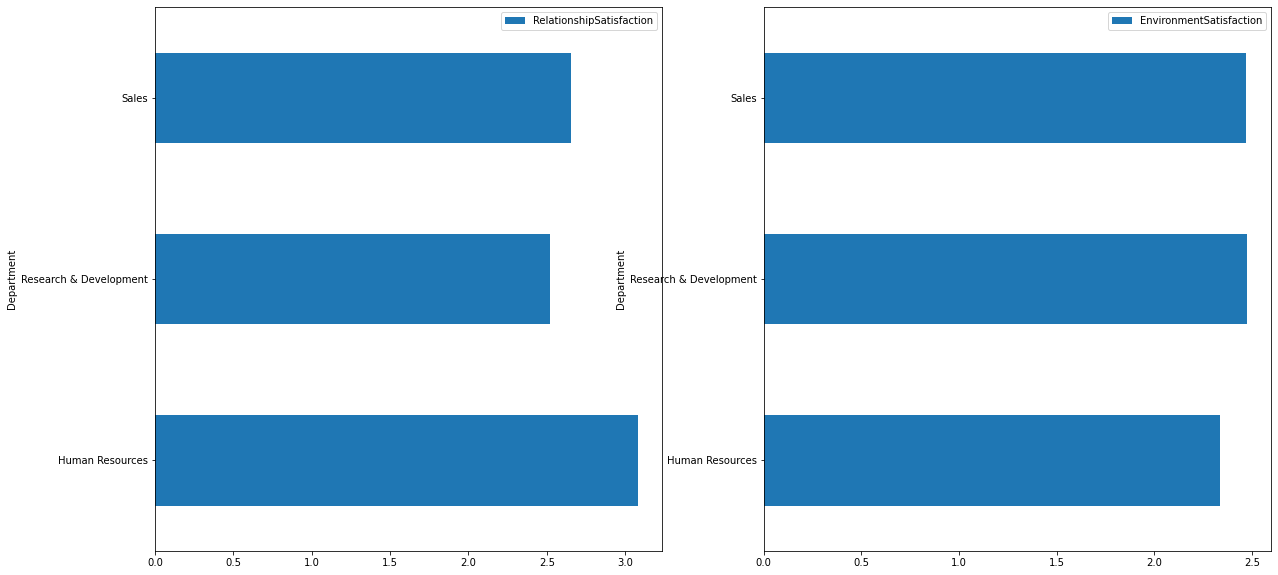

In [33]:
f, ax= plt.subplots(1,2,figsize=(20,10))
Attrition[["RelationshipSatisfaction","Department"]].groupby("Department").mean().plot.barh(ax=ax[0])
Attrition[['EnvironmentSatisfaction',"Department"]].groupby("Department").mean().plot.barh(ax=ax[1])

In [35]:
print(Attrition[["RelationshipSatisfaction","Department"]].groupby("Department").mean(),
     Attrition[['EnvironmentSatisfaction',"Department"]].groupby("Department").mean(),
     Attrition[["WorkLifeBalance","Department"]].groupby("Department").mean(),
     Attrition[["JobSatisfaction","Department"]].groupby("Department").mean())

                        RelationshipSatisfaction
Department                                      
Human Resources                         3.083333
Research & Development                  2.518797
Sales                                   2.652174                         EnvironmentSatisfaction
Department                                     
Human Resources                        2.333333
Research & Development                 2.473684
Sales                                  2.467391                         WorkLifeBalance
Department                             
Human Resources                2.916667
Research & Development         2.578947
Sales                          2.739130                         JobSatisfaction
Department                             
Human Resources                2.166667
Research & Development         2.458647
Sales                          2.521739


Human Resources : JobSatisfaction, EnvironmentSatisfaction

In [36]:
data['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [38]:
#크로스태블릿
pd.crosstab(data.Education,
            data.Department, margins=True).style.background_gradient(
                cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


In [41]:
pd.crosstab(data.StockOptionLevel,
            data.Department, margins=True).style.background_gradient(
                cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
StockOptionLevel,,,,
0,27,407,197,631
1,28,393,175,596
2,3,103,52,158
3,5,58,22,85
All,63,961,446,1470


                        StockOptionLevel
Department                              
Human Resources                      0.5
Research & Development               0.0
Sales                                0.0


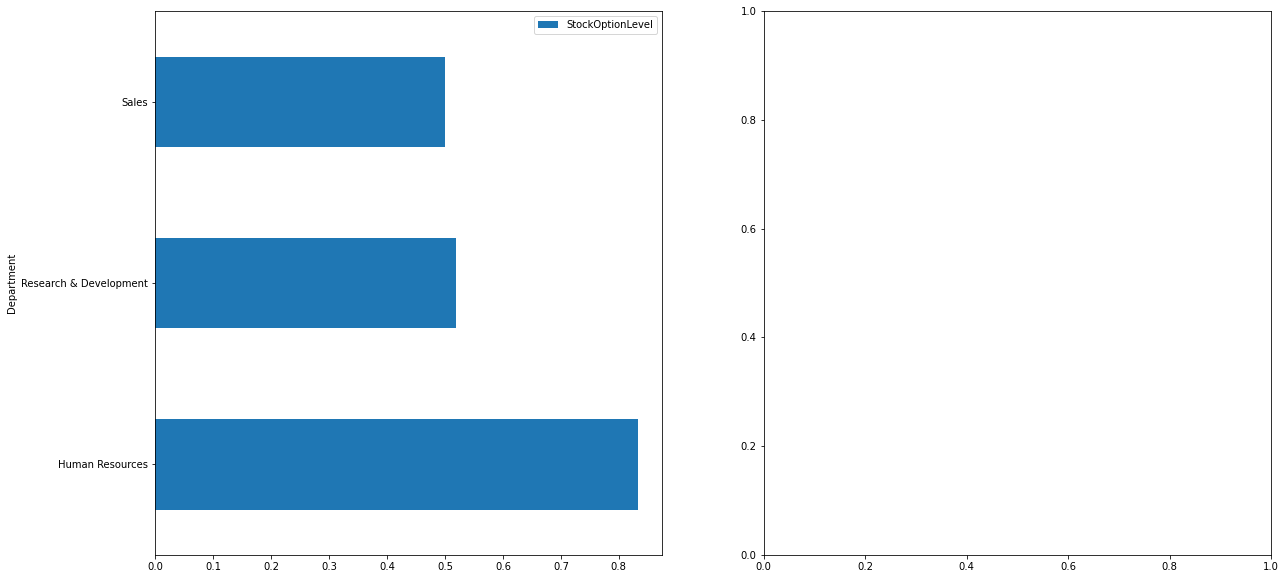

In [49]:
f, ax= plt.subplots(1,2,figsize=(20,10))
Attrition[["Department","StockOptionLevel"]].groupby("Department").mean().plot.barh(ax=ax[0])
print(Attrition[["Department","StockOptionLevel"]].groupby("Department").median())

In [43]:
pd.crosstab(data.JobInvolvement,
            data.Department, margins=True).style.background_gradient(
                cmap='summer_r')

Department,Human Resources,Research & Development,Sales,All
JobInvolvement,,,,
1,3,51,29,83
2,17,248,110,375
3,36,560,272,868
4,7,102,35,144
All,63,961,446,1470
